In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('gdrive/MyDrive/PersonalReason.csv')

In [ ]:
#remove from the 'EXIT' column the completed data to avoid bias or overfitting
df1 = df[df.Reason != 'Completed']

In [ ]:
df.head()

,Unnamed: 0,PersonalStatement,Reason
0,0,I believe I am an ideal candidate for this cou...,Completed
1,1,I have been fascinated with forensic science f...,Completed
2,2,I would like to study Electronic Engineering a...,Completed
3,4,Gaining expert knowledge of both law and Busin...,Completed
4,5,"My passion for History began at a young age, w...",Completed


In [ ]:
#removing unnamed
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


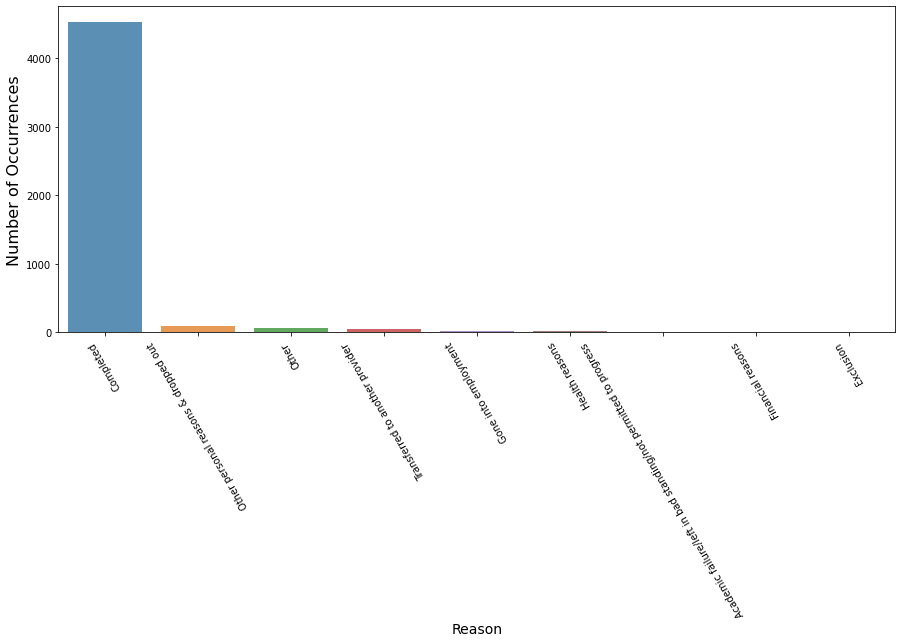

In [ ]:
#data visualisation of how  the classes of the personal statements are distributed with statements of students that completed their degrees
cnt_pro = df['Reason'].value_counts()

plt.figure(figsize=(15,6))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('Reason', fontsize=14)
plt.xticks(rotation=120)
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


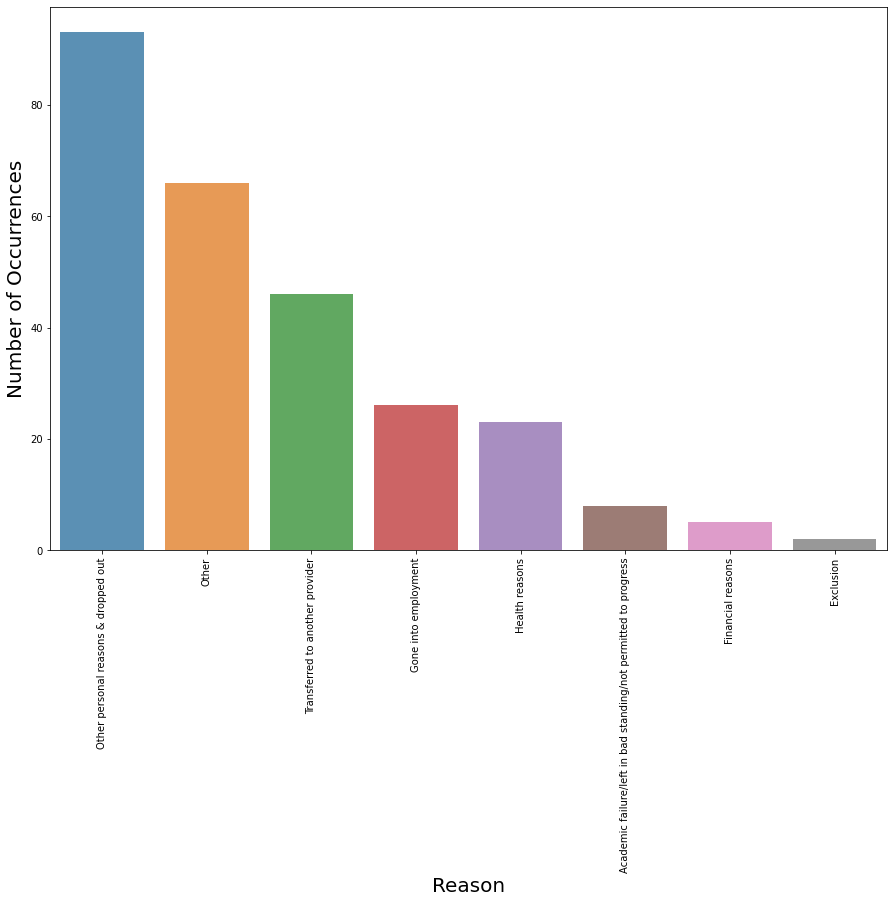

In [ ]:
#data visualisation of how  the classes of the personal statements are distributed without statements of students that completed their degrees

cnt_pro = df1['Reason'].value_counts()

plt.figure(figsize=(15,10))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Reason', fontsize=20)
get
plt.xticks(rotation=180)
plt.show();

**DATA PREPROCESSING**

In [ ]:
#Text preprocessing
#Below we define a function to convert text to lower-case and strip punctuation/symbols from words and so on.

from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['PersonalStatement'] = df['PersonalStatement'].apply(cleanText)

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


In [ ]:
#Train/test split 85/15
train, test = train_test_split(df, test_size=0.15, random_state=42)

In [ ]:
import nltk
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['PersonalStatement']), tags=[r.Reason]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['PersonalStatement']), tags=[r.Reason]), axis=1)

In [ ]:
#what the taining looks like
train_tagged.values[30]

TaggedDocument(words=['my', 'name', 'is', 'jayne', 'alison', 'palmer', 'am', '35', 'years', 'old-', 'would', 'relish', 'the', 'chance', 'to', 'be', 'accepted', 'on', 'the', 'university', 'course', 'to', 'help', 'me', 'work', 'towards', 'fulfilling', 'my', 'dreams', 'further', 'myself', 'career', 'lifestyle', 'options', 'consider', 'myself', 'very', 'well', 'rounded', 'personality', 'confident', 'well', 'traveled', 'dedicated', 'enthusiastic', 'driven', 'to', 'succeed', 'since', 'leaving', 'school', 'have', 'studied', 'art', 'before', 'moving', 'to', 'france', 'and', 'working', 'as', 'l2', 'river', 'guide', 'coach', 'in', 'both', 'canoe', 'kayaking', 'on', 'the', 'ardeche', 'river', 'later', 'returned', 'to', 'the', 'uk', 'to', 'train', 'as', 'hairstylist', 'which', 'enabled', 'me', 'to', 'immediately', 'travel', 'for', 'over', '10', 'years', 'mainly', 'in', 'nz', 'australia', 'this', 'is', 'the', 'only', 'reason', 'did', 'not', 'complete', 'my', 'l3', 'have', 'managed', 'salons', 'taug

In [ ]:
#what the taining looks like
train_tagged.values[20]

TaggedDocument(words=['jurgen', 'klopp', 'is', 'good', 'coach', 'in', 'the', 'modern', 'era', 'of', 'football', 'what', 'makes', 'him', 'great', 'coach', 'is', 'his', 'high', 'understanding', 'of', 'the', 'game', 'his', 'leadership', 'skills', 'management', 'skills', 'his', 'communication', 'skills', 'and', 'most', 'importantly', 'his', 'eperience', 'as', 'player', 'can', 'be', 'applied', 'in', 'his', 'strategies', 'to', 'win', 'games', 'find', 'him', 'an', 'inspiration', 'and', 'want', 'to', 'help', 'the', 'net', 'generation', 'to', 'reach', 'elite', 'performance', 'my', '90-credit', 'diploma', 'in', 'sport', 'has', 'inspired', 'me', 'to', 'continue', 'further', 'studying', 'sport', 'as', 'the', 'depth', 'which', 'sport', 'has', 'in', 'different', 'sectors', 'of', 'society', 'has', 'inspired', 'me', 'to', 'complete', 'every', 'aspect', 'of', 'my', 'current', 'studies', 'to', 'the', 'highest', 'level', 'realised', 'this', 'when', 'completing', 'work', 'eperience', 'at', 'appleton', 'pr

In [ ]:
#what the taining looks like
train_tagged.values[10]

TaggedDocument(words=["'ve", 'always', 'been', 'drawn', 'towards', 'the', 'caring', 'professions', 'believe', 'my', 'desire', 'to', 'become', 'paramedic', 'has', 'became', 'more', 'prominent', 'over', 'the', 'last', 'few', 'years', "'ve", 'loved', 'science', 'especially', 'biology', 'since', 'primary', 'school', 'the', 'range', 'of', "'how", 'my', 'body', 'works', 'books', 'sparked', 'love', 'for', 'anatomy', 'as', 'child', 'have', 'spent', 'many', 'years', 'watching', 'my', 'favourite', 'hospital', 'dramas', 'and', 'documentaries', 'always', 'thinking', '``', "'d", 'be', 'good', 'at', 'that', "''", 'upon', 'leaving', 'school', 'became', 'dental', 'nurse', 'really', 'enjoyed', 'the', 'care', 'of', 'the', 'patients', 'interacting', 'with', 'different', 'people', 'and', 'being', 'part', 'of', 'team', 'found', 'the', 'qualification', 'course', 'really', 'interesting', 'and', 'was', 'like', 'sponge', 'soaking', 'up', 'all', 'the', 'new', 'information', 'about', 'human', 'anatomy', 'nerves'

In [ ]:
#what the taining looks like
train_tagged.values[100]

TaggedDocument(words=['following', 'discussion', 'with', 'the', 'programme', 'director', 'for', 'both', 'my', 'current', 'programme', 'and', 'the', 'programme', 'am', 'applying', 'for', 'this', 'personal', 'statement', 'is', 'not', 'required', 'am', 'currently', 'student', 'on', 'the', 'foundation', 'degree', 'in', 'early', 'childhood', 'studies', 'degree', 'course', 'at', 'the', 'university', 'of', 'hull', 'and', 'am', 'epected', 'to', 'graduate', 'in', 'june', '2019.', 'the', 'foundation', 'degree', 'in', 'childhood', 'studies', 'degree', 'is', 'two', 'year', 'full', 'time', 'undergraduate', 'programme', 'which', 'enables', 'students', 'to', 'develop', 'an', 'insight', 'into', 'education', 'and', 'early', 'years', 'drawing', 'on', 'wide', 'range', 'of', 'sources', 'theories', 'disciplines', 'and', 'subjects', 'we', 'are', 'epected', 'to', 'attend', 'early', 'years', 'settings', 'in', 'order', 'to', 'develop', 'our', 'understanding', 'of', 'the', 'way', 'in', 'which', 'young', 'childr


Training the model We'll instantiate a Doc2Vec model-Distributed Bag of Words (DBOW). In the Word2Vec architecture, the two algorithm names are “continuous bag of words” (cbow) and “skip-gram” (sg); in the Doc2Vec architecture, the corresponding algorithms are “distributed bag of words” (dbow) and “distributed memory” (dm).

In [ ]:
import multiprocessing

cores = multiprocessing.cpu_count()

In [ ]:
#Build a vocabulary

model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0,max_iter = 30, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 4320/4320 [00:00<00:00, 1005683.15it/s]


In [ ]:
%%time
for epoch in range(50):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 4320/4320 [00:00<00:00, 2368238.57it/s]


CPU times: user 5min 25s, sys: 2.3 s, total: 5min 28s
Wall time: 2min 57s


**Buliding the final vector feature for the classifier**

In [ ]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=30)) for doc in sents])
    return targets, regressors

In [ ]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

In [ ]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.972972972972973
Testing F1 score: 0.9596445760829323


Distributed Memory with Averaging Distributed Memory (DM) acts as a memory that remembers what is missing from the current context — or as the topic of the paragraph. While the word vectors represent the concept of a word, the document vector intends to represent the concept of a document. We again instantiate a Doc2Vec model with a vector size with 300 words and iterating over the training corpus 30 times.

In [ ]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=2, negative=5, min_count=1, max_iter = 30,  workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 4320/4320 [00:00<00:00, 1423920.89it/s]


In [ ]:
%%time
for epoch in range(50):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

100%|██████████| 4320/4320 [00:00<00:00, 2624097.51it/s]


CPU times: user 7min 19s, sys: 7.31 s, total: 7min 27s
Wall time: 4min 18s


#**TRAIN LOGISTIC REGRESSION**

In [ ]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_test, X_test = vec_for_learning(model_dmm, test_tagged)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.9521829521829522
Testing F1 score: 0.9491408341248597


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [ ]:
pip install testfixtures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def get_vectors(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [ ]:
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

In [ ]:
y_train, X_train = get_vectors(new_model, train_tagged)
y_test, X_test = get_vectors(new_model, test_tagged)

In [ ]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.9584199584199584
Testing F1 score: 0.9523153726975383


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
